# Exploratory data analysis

### Loading in our data 

The first step in doing our exploratory data analysis is loading in our data. The sensor data is split up into multiple files, one for each device. For the exploratory data analysis howevere we will only be looking at one device, namely device B, likely located in a fridge. We will be loading in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#df_alarm = pd.read_excel('alarm sensors.xlsx')
#df_A = pd.read_excel('data_A.xlsx')
df_B = pd.read_excel('data/data_B.xlsx')
#df_AA = pd.read_excel('data_AA.xlsx')

In [2]:
##df_alarm
df_B

,DeviceId,EventDt,Temp
0,B,2018-11-18 16:13:06.177,5.77
1,B,2018-11-18 16:18:06.173,5.79
2,B,2018-11-18 16:23:06.157,5.89
3,B,2018-11-18 16:28:06.173,6.05
4,B,2018-11-18 16:33:06.183,6.07
...,...,...,...
315821,B,2021-11-18 15:49:06.607,5.64
315822,B,2021-11-18 15:54:06.590,5.43
315823,B,2021-11-18 15:59:06.597,5.41
315824,B,2021-11-18 16:04:06.610,5.54


The provided data has 315 thousand rows. Every row has data for the current temperature, the time it was recorded and the device it's recorded on. There seems to be a new recording every 5 seconds. The data has been recorded over 3 years.

In [3]:
df_B.isna().sum()

DeviceId    0
EventDt     0
Temp        0
dtype: int64

There is no missing data in this dataset. We can't speak for every file yet, but for this one we won't need to think about missing data. 

### Visualising the data
Next we can visualise the data. We will make a graph, plotting all the temperatures against the time. We can see that in 2020 the temperature reaches to nearly 30 degrees. Other than that there are also a lot of outliers nearing 10 degrees, and a few outliers below 5 degrees. 

<AxesSubplot:xlabel='EventDt', ylabel='Temp'>

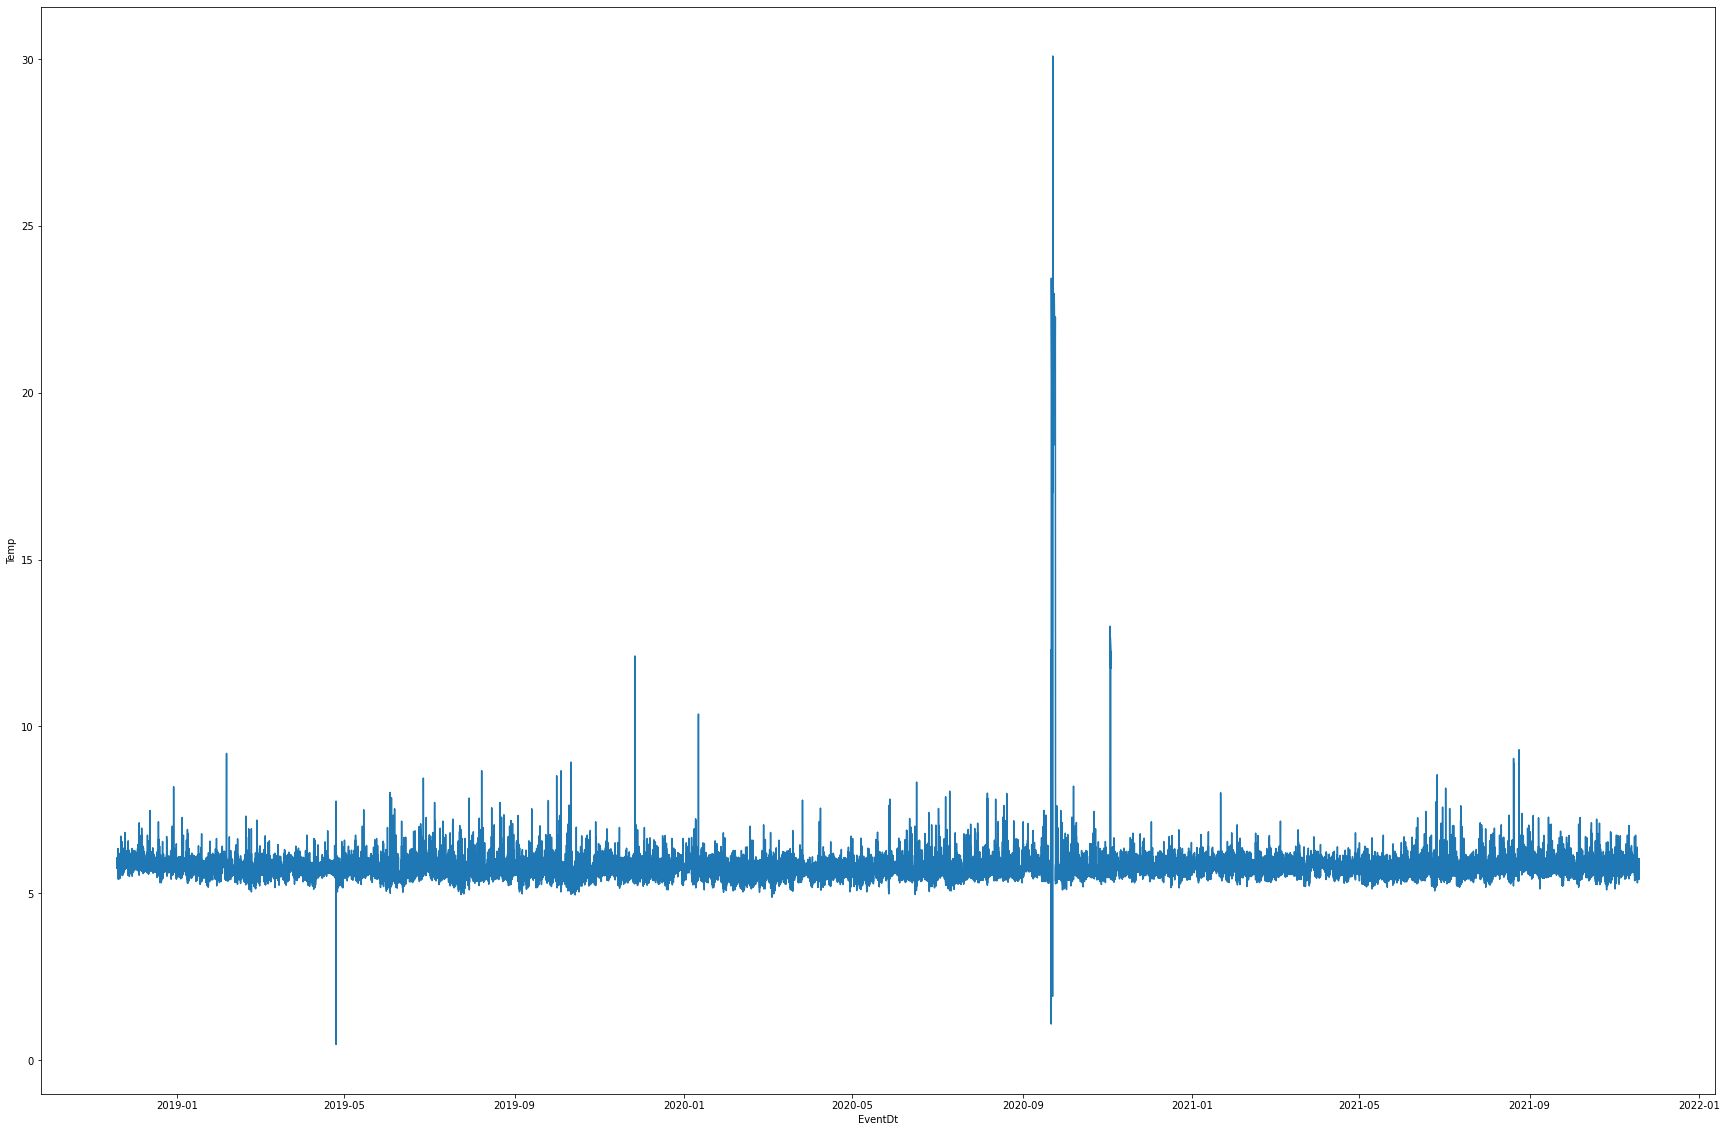

In [8]:
plt.figure(figsize = (30,20))
sns.lineplot(data=df_B, x="EventDt", y="Temp", legend="full")

Let's take a closer look at the data of 2020, where the temperature neared 30 degrees. What's interesting is that before the fridge heated up, the temperature dropped low.

<AxesSubplot:xlabel='EventDt', ylabel='Temp'>

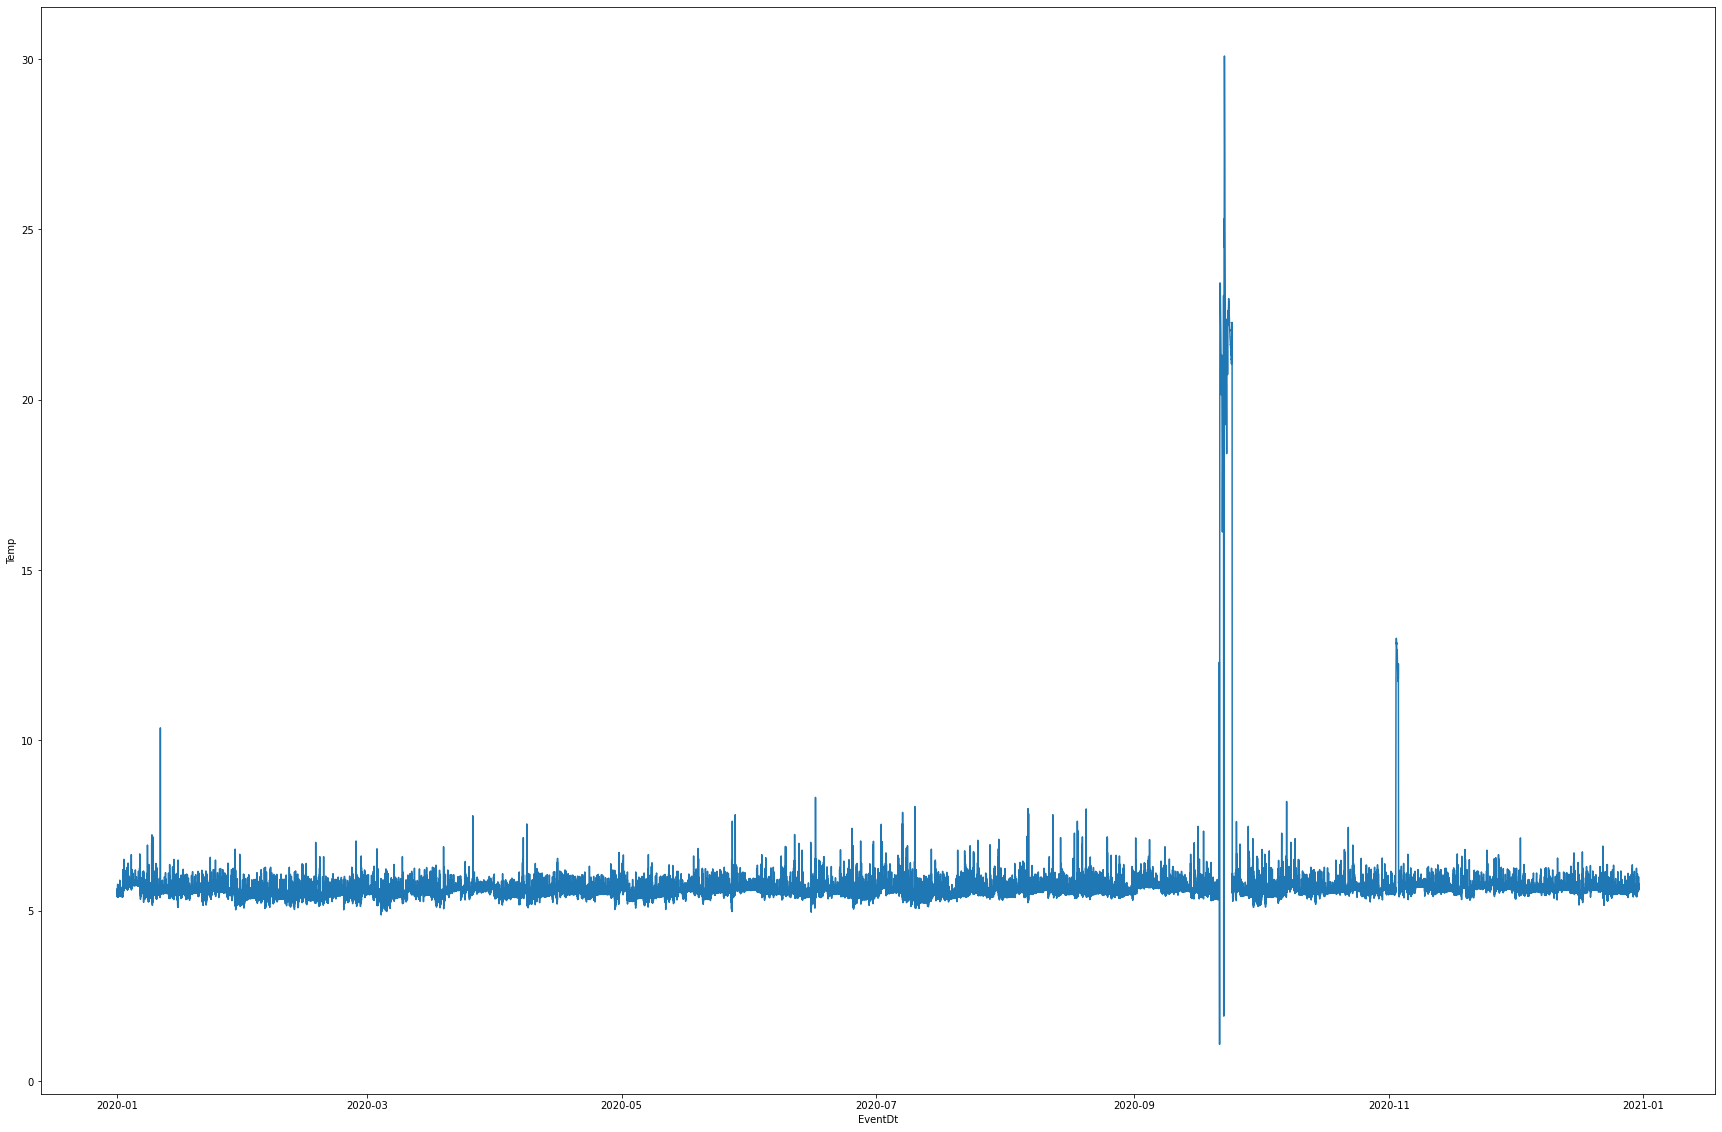

In [7]:
plt.figure(figsize = (30,20))
df_B_2020 = df_B.loc[(df_B['EventDt'] > "2020-01-01") & (df_B['EventDt'] <= "2020-12-31")]
sns.lineplot(data=df_B_2020, x="EventDt", y="Temp", legend="full")

In [6]:
df_B["Year"] = np.nan
df_B["Year"].loc[(df_B['EventDt'] > "2018-01-01") & (df_B['EventDt'] <= "2018-12-31")] = 2018
df_B["Year"].loc[(df_B['EventDt'] > "2019-01-01") & (df_B['EventDt'] <= "2019-12-31")] = 2019
df_B["Year"].loc[(df_B['EventDt'] > "2020-01-01") & (df_B['EventDt'] <= "2020-12-31")] = 2020
df_B["Year"].loc[(df_B['EventDt'] > "2021-01-01") & (df_B['EventDt'] <= "2021-12-31")] = 2021

#df_B["Year"] = df_B_jaar1.fillna("2018")


df_B

C:\Users\Nibbl\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,DeviceId,EventDt,Temp,Year
0,B,2018-11-18 16:13:06.177,5.77,2018.0
1,B,2018-11-18 16:18:06.173,5.79,2018.0
2,B,2018-11-18 16:23:06.157,5.89,2018.0
3,B,2018-11-18 16:28:06.173,6.05,2018.0
4,B,2018-11-18 16:33:06.183,6.07,2018.0
...,...,...,...,...
315821,B,2021-11-18 15:49:06.607,5.64,2021.0
315822,B,2021-11-18 15:54:06.590,5.43,2021.0
315823,B,2021-11-18 15:59:06.597,5.41,2021.0
315824,B,2021-11-18 16:04:06.610,5.54,2021.0
